In [12]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [13]:
with open("df.pkl","rb") as fr:
    df = pickle.load(fr)
df

,거래량,미결제약정,상대가격,분류,잔존만기,rate,이론하한,종가,이상치수치,행사가
0,78,2010,1.173773,1,0.023810,1.964,0.174240,0.172045,NaN,220.0
1,2,106,1.075958,1,0.023810,1.964,0.076426,0.083333,1537.881035,240.0
2,1,10,1.064866,1,0.023810,1.964,0.065333,0.064330,NaN,242.5
3,1,32,1.054000,1,0.023810,1.964,0.054468,0.054694,-22.106147,245.0
4,1,40,1.043354,1,0.023810,1.964,0.043821,0.044444,-24.763321,247.5
...,...,...,...,...,...,...,...,...,...,...
225044,1,1313,1.037342,0,1.936508,1.148,0.000000,0.086184,7.629870,380.0
225045,1,10,1.459963,0,2.908730,1.148,0.000000,0.034630,5.763834,270.0
225046,2,51,1.407821,0,2.908730,1.148,0.000000,0.037500,5.229184,280.0
225047,5,311,1.313967,0,2.908730,1.148,0.000000,0.046667,5.848616,300.0


In [14]:
df.query('abs(이상치수치)>1000')

,거래량,미결제약정,상대가격,분류,잔존만기,rate,이론하한,종가,이상치수치,행사가
1,2,106,1.075958,1,0.023810,1.964,0.076426,0.083333,1537.881035,240.0
253,1,4,1.100086,1,0.019841,1.776,0.100438,0.109032,2187.488431,232.5
1376,2,74,1.073131,1,0.003968,1.750,0.073201,0.074141,2178.360609,247.5
1557,18,511,0.915862,0,0.003968,1.750,0.084068,0.084655,2423.738597,290.0
5829,8,11,0.939738,0,0.031746,1.790,0.059694,0.064426,1032.922686,305.0
...,...,...,...,...,...,...,...,...,...,...
215835,1,1,2.402667,1,0.047619,0.737,1.403018,1.403636,4943.494443,165.0
218785,15,275,1.068980,1,0.011905,0.828,0.069078,0.069660,1046.330718,367.5
219497,40,1185,2.837643,1,0.003968,1.019,1.837683,1.841786,1087.905730,140.0
219511,928,7745,1.038614,1,0.003968,1.019,0.038655,0.039477,1264.319677,382.5


In [15]:
df2 = df.rename(columns={'거래량':'volume','거래대금':'trdprc','미결제약정':'opint','상대가격':'relprc','잔존만기':'T',
                         '분류':'type','이론하한':'lower','이상치수치':'abnorm_idx','행사가':'K','종가':'c'})

In [16]:
thr = 20
df2['abnorm_cls'] = ''
print(len(df2.query('abs(abnorm_idx)>%f or abnorm_idx!=abnorm_idx'%thr)))
df2.loc[df2['abnorm_idx']>thr,'abnorm_cls'] = 'abnormal'
df2.loc[pd.isna(df2['abnorm_idx']),'abnorm_cls'] = 'abnormal'
df2.loc[df2['abnorm_idx']<=thr,'abnorm_cls'] = 'normal'
df2 = df2.drop('abnorm_idx',axis=1)
df2

22645


,volume,opint,relprc,type,T,rate,lower,c,K,abnorm_cls
0,78,2010,1.173773,1,0.023810,1.964,0.174240,0.172045,220.0,abnormal
1,2,106,1.075958,1,0.023810,1.964,0.076426,0.083333,240.0,abnormal
2,1,10,1.064866,1,0.023810,1.964,0.065333,0.064330,242.5,abnormal
3,1,32,1.054000,1,0.023810,1.964,0.054468,0.054694,245.0,normal
4,1,40,1.043354,1,0.023810,1.964,0.043821,0.044444,247.5,normal
...,...,...,...,...,...,...,...,...,...,...
225044,1,1313,1.037342,0,1.936508,1.148,0.000000,0.086184,380.0,normal
225045,1,10,1.459963,0,2.908730,1.148,0.000000,0.034630,270.0,normal
225046,2,51,1.407821,0,2.908730,1.148,0.000000,0.037500,280.0,normal
225047,5,311,1.313967,0,2.908730,1.148,0.000000,0.046667,300.0,normal


findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


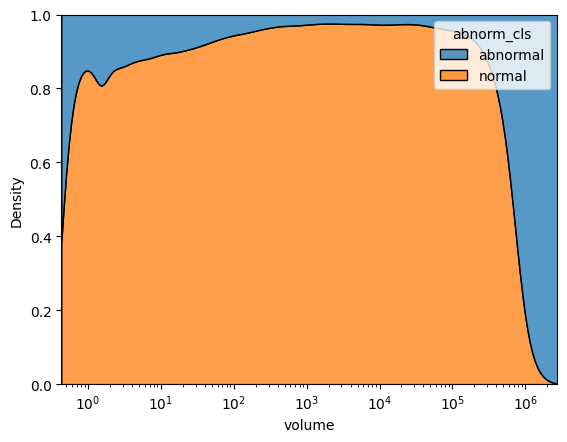

In [6]:
sns.kdeplot(data=df2,x='volume',hue='abnorm_cls',multiple='fill',log_scale=True)
plt.show()

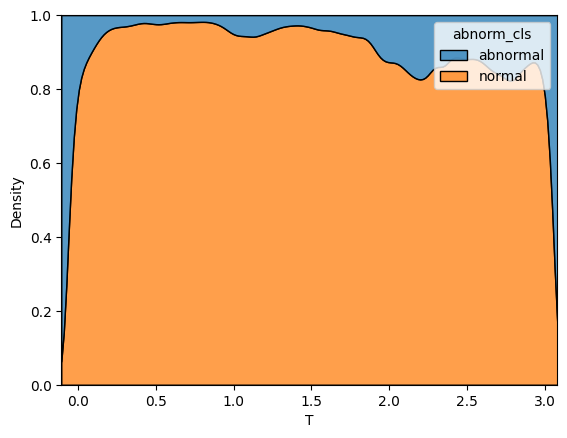

In [7]:
sns.kdeplot(data=df2,x='T',hue='abnorm_cls',multiple='fill')
plt.show()

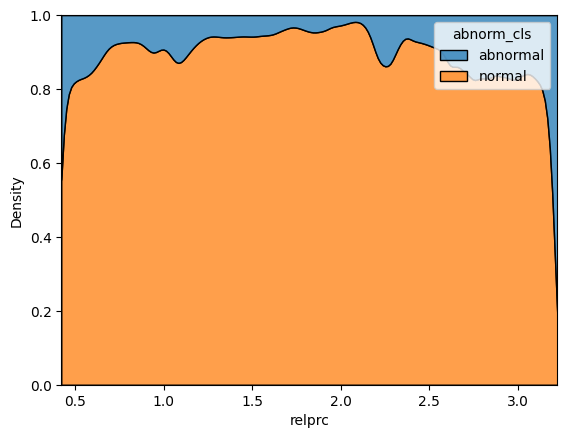

In [8]:
sns.kdeplot(data=df2,x='relprc',hue='abnorm_cls',multiple='fill')
plt.show()

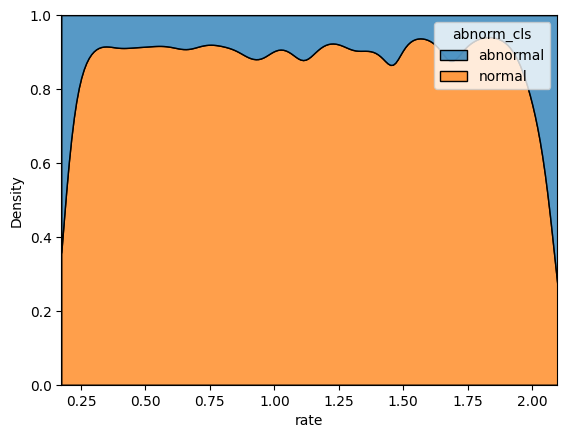

In [9]:
sns.kdeplot(data=df2,x='rate',hue='abnorm_cls',multiple='fill')
plt.show()

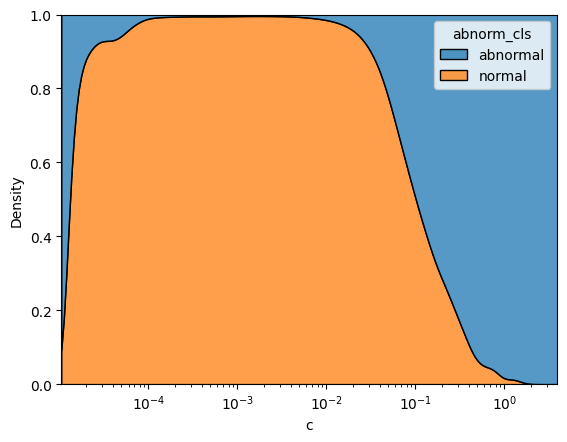

In [10]:
sns.kdeplot(data=df2,x='c',hue='abnorm_cls',multiple='fill',log_scale=True)
plt.show()